# Symbolisches Rechnen

Bisher haben wir uns auf den *numerischen* Teil konzentriert; d.h. das Ausrechnen von Werten. Mit Python können wir allerdings auch *symbolisches Rechnen* durchführen, also das Bearbeiten von symbolischen Ausdrücken (Computer Algebra System (CAS)).

CAS sind keine Alleskönner, können aber eine signifikante Hilfe sein. In der Kombination mit numerischer Berechnung kann hat man mächtige Werkzeuge zur Verfügung.

Wir benutzen hierfür eine Kombination aus den Modulen  **SymPy** u.

## Einfache Ausdrücke

Man muss erstmal die Symbole Python bekannt machen, um damit etwas tun zu können. Das passiert mit:

``` python
sympy.symbols(varliste)
```

Die Funktion erzeugt die in einer String-Liste angegebenen Variablen als Symbole und gibt diese zurück. Dann kann man via *pattern matching* diesen normale Variablennamen geben.

*Beispiel:* Wir erzeugen die mathematischen Symbole $x$ und $y$ und geben ihnen die Namen ```x``` und  ```y```

In [1]:
from sympy import symbols

x,y = symbols('x,y')

Jetzt erzeugen wir unseren ersten Ausdruck. Dafür importieren wir in diesem Beispiel auch eine Funktion (exp) aus SymPy.

*Vorsicht:* das ist eine andere Funktion als die aus `numpy`.

In [1]:
from sympy import exp
expr = exp(x) + 1
expr

exp(x) + 1

Das ist jetzt ein mathematischer Ausdruck in dem wir z.B. Substituieren können:

```python
expr_object.subs(varname,value)
```
substituiert die *varname* mit *value*.


In [1]:
expr.subs(x,1)

1 + E

In SymPy kann man auch schönen mathematischen Formelsatz zur Darstellung verwenden (durch $\LaTeX$). Dafür brauchen wir

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

Dann werden die Ausdrücke mittels $\LaTeX$ gerendert und eben einfach *schön* dargestellt.

In [1]:
expr

Ausdrücke können auch direkt über strings erzeugt werden

``` python
sympy.sympify(ausdruckstring)
```

- `ausdruckstring`:  ein String eines mathematischen Ausdrucks. Variablen die darin vorkommen werden automatisch als solche erzeugt. 

In [1]:
from sympy import sympify

expr = sympify("x**2 + exp(x)")
expr.subs(x,2)

### Vereinfachungen

Die mit häufigste Operation auf symbolischen Ausdrücken ist deren *Vereinfachung*. 

```python
expr_object.simplify()
```

*Hinweis:* Es werden alle möglichen Vereinfachungen angewandt; es ist nicht eindeutig was am Einfachsten ist, daher kann sein, dass die Funktion nicht das macht, was man erwartet.

In [1]:
from sympy import sin, cos
(sin(x)**2 + cos(x)**2).simplify()

### Operatoren und Operanden - der Abstract Syntax Tree (AST)

Ausdrücke in ihre Operatoren und Operanden aufteilen ist eine Basis-Funktionalität im symbolischen Rechnen. 
Dafür wird ein Syntax-Baum aufgebaut, deren Knoten und Blätter bestehen aus Operatoren und Operanden.

Das Auseinandernehmen in einen String erledigt 

``` python
srepr(expr)
```


In [1]:
from sympy import srepr
srepr(expr)

"Add(Pow(Symbol('x'), Integer(2)), exp(Symbol('x')))"

Nun wollen wir das aber nicht nur "Lesen" sondern auch programmatisch weiterverarbeiten. 
Jeder Ausdruck stellt dafür eine Objektvariable zur Verfügung, die die Argumente (Operatoren und Operanden) enthält. 

``` python
expr.args
```

Wir schreiben uns eine kleine rekursive Funktion um durch den Baum durchzugehen

In [1]:
def traverse(expr):
    print(expr)
    for arg in expr.args:
        traverse(arg)
traverse(expr)

x**2 + exp(x)
x**2
x
2
exp(x)
x


Es gibt auch bereits eine vorgefertigte Funktion, die durch den Baum geht und einen entsprechenden Iterator zurückgibt.

``` python
preorder_traversal(expr)
```


In [1]:
from sympy import preorder_traversal
for arg in preorder_traversal(expr):
    print(arg)

x**2 + exp(x)
x**2
x
2
exp(x)
x


#### ein bisschen grafische Spielerei
Mit networkx und holoviews können wir hier den Baum als Graph darstellen. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
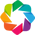

In [1]:
import networkx as nx
import holoviews as hv
hv.extension('bokeh')

In [1]:
def stringify_expr(expr):
    if expr.args:
        # Ausdruck hat Argumente => Funktion oder ähnliches
        return expr.func.__name__
    elif expr.is_Symbol:
        return 'Sym({})'.format(expr.name)
    else:
        # Andere Ausdrücke (z.B. Zahlen) direkt zurückgeben
        return str(expr)

def expr_to_graph(expr):
    g = nx.Graph()
       
    def traverse(ex, idx=1):
        # Walk erzeugt den Graphen für den Ausdruck `ex` und gibt den root-node
        # zurück. Die Funktion ruft sich dabei rekursiv selbst auf.
        root = idx 
        g.add_node(root, name=stringify_expr(ex))
        for arg in ex.args:
            idx+=1
            v = traverse(arg, idx)
            g.add_edge(root, v)
        return root
    
    traverse(expr)
    return g

In [1]:
from sympy import sympify
expr = sympify("x**2 + exp(x)")
g = expr_to_graph(expr)

In [1]:
options = {'Graph': dict(color_index='index', cmap='Set1')}
padding = dict(x=(-1.2, 1.2), y=(-1.2, 1.2))
hv.Graph.from_networkx(g, nx.layout.spring_layout).redim.range(**padding).options(options)

:Graph   [start,end]

Weitere Vereinfachungs-Funktionen findet man in der Dokumentation. Wir gehen nicht weit auf dieses Thema ein, da unser Fokus auf der Programmierung im wissenschaftlichen Rechnen liegt.

## Polynome

Polynome sind der Kern der Computer-Algebra. 

``` python
sympy.poly(expr)
```

- `expr`: Ausdruck

*Beispiel:* Erzeugung eines Polynom-Objektes:

In [1]:
from sympy import poly
expr = x**2 + 4*x**3 + x + 5
a = poly(expr)

Das Objekt hat jetzt eine Reiher spezieller Eigenschaften

``` python
poly_object.coeffs()
```

gibt die Koeffizienten des Polynoms in der Form

$$f(x) = a_0 x^n + a_1 x^{n-1} + \dots  + a_i x^{n-i}, i = 0..n$$

wobei $n$ der Grad des Polynoms ist


In [1]:
a.coeffs()

Grad des Polynoms

In [1]:
a.degree()

Polynom-Objekte haben noch einige weitere (zusätzliche) Eigenschaften im Vergleich zu einfachen Ausdrücken uns reicht hier aber schon die paar Befehle.

#### Nullstellen bestimmen und Gleichungen lösen

``` python
sympy.solve(expr_object, x)
```

- `expr_object`: Ausdrucks-Objekt
- `x`: löst bzgl. der Variablen $x$

löst eine Gleichung

``` python
sympy.roots(expr_object)
```

findet Nullstellen


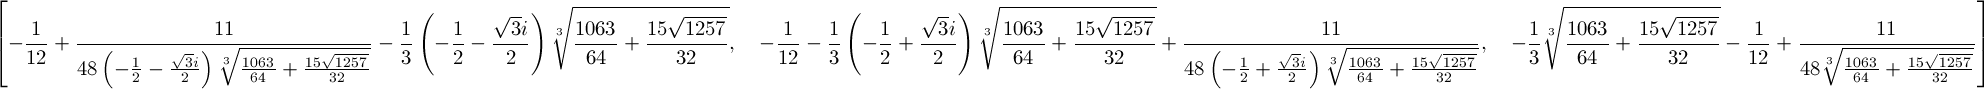

In [1]:
from sympy import roots,solve

null = solve(expr, x)
null

Das sind jetzt zwar schöne mathematische und exakte Ausdrücke, aber manchmal bin ich nur an harten Zahlen interessiert. 

#### Numerische Auswertung von Funktionen und Ausdrücken

Es gibt mehrere Möglichkeiten für die Auswertung von symbolischen Ausdrücken. Mit *subs()* haben wir einen Teil davon bereits erledigen: Wir können Variablen durch Zahlen (oder andere Variablen ersetzen). 

Wollen wir jetzt eine numerische Auswertung gegebener Präzision, nutzen wir dafür 

``` python
expr_object.evalf(n)
```

- **n**: Genauigkeit in Nachkommastellen.



In [1]:
expr2 = sympify("x**2 + exp(x)")
expr2.subs(x,2).evalf(100)

Das können wir jetzt nutzen um die Nullstellen als einfache Zahl zu bekommen

In [1]:
[x.evalf() for x in null]

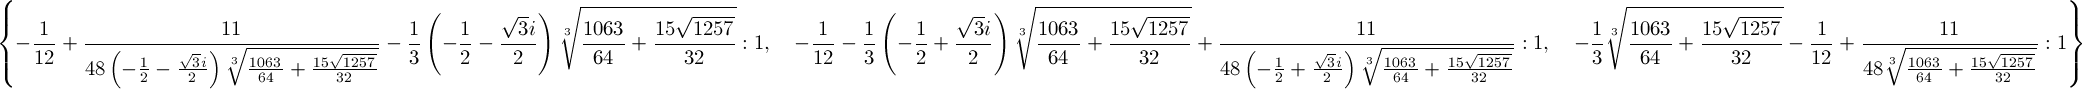

In [1]:
roots(expr)

### Grenzwerte

das symbolische Bestimmen von Grenzwerten kann man mit

``` python
expr_objekt.limit(var, grenze)
```

- `var`: variablenname
- `grenze`: Ort an dem geprüft werden soll. Kann auch *unendlich* (```oo```) sein.

Als *unendlich* kann das Symbol `oo` benutzt werden:

``` python
from sympy import oo
```

In [1]:
(sin(x)/x).limit(x,0)

In [1]:
from sympy import oo
(sin(x)/x).limit(x,oo)

### Differentation 

``` python
expr_object.diff(var1, var2, ..)
```
Leitet das entsprechende Objekt nach der gegebenen Variable ab. Mehrere Angabe von Variablen führt zu mehrmaligen Ableiten in der gegebenen Reihenfolge.


In [1]:
expr.diff()

In [1]:
expr.diff(x,x)

#### Taylorformel
Sei $f:I \rightarrow \mathbb{R}$ $(n+1)$-mal differenzierbar und seien $x,x_0 \in I$, $x \neq x_0$. Dann gibt es $\xi \in \mathbb{R}$, so dass  
$$f(x) = f(x_0) + \frac{f\,'(x_0)}{1!}(x-x_0)+\frac{f\,''(x_0)}{2!}(x-x_0)^2 + \cdots + \frac{f^{\,n}(x_0)}{n!}(x-x_0)^n +R_n(x,x_0)$$ gilt mit dem Lagrangschen Restglied $$R_n(x,x_0) := \frac{f^{\,(n+1)}(\xi)}{(n+1)!} (x-x_0)^{n+1}.$$ 

Taylorpolynom $(n)$-ten Grades zu einem Ausdruck $f$ (mit Unbekannten $x$) am Entwicklungspunkt $x0$.  

``` python
expr_object.series(expr, x, x0, n)
```
- `expr`: Ausdruck
- `x`: Variable um die entwickelt werden soll
- `x0`: Entwicklungspunkt
- `n`: Anzahl Glieder



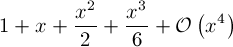

In [1]:
exp(x).series(x,0,4)

###  Integration

unbestimmtes Integral

``` python
expr_object.integrate(args)
```
- `args` : Integrationsvariablen 

bestimmtes Integral

``` python
expr_object.integrate(tripel)
```
- `tripel` : (Integrationsvariable, untere Schranke, obere Schranke)





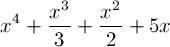

In [1]:
expr.integrate()

In [1]:
from sympy import oo
expr.integrate((x, 0, oo))

### Matrizen 

Hier nutzen wir 

``` python
sympy.Matrix(liste)
```
- `liste`: einfache oder doppelt verkettete Liste von Einträgen entsprechend der Ausgabe- Dimension


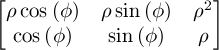

In [1]:
from sympy import Matrix, cos, sin

rho, phi = symbols ('rho,phi')
Matrix([[rho*cos(phi), rho*sin(phi), rho**2],[ cos(phi), sin(phi), rho]])

### höherdimensionale Funktionen

Mit Matrizen kann man jetzt höherdimensionale Funktionen geeignet nutzen

*Beispiel:* 
$f: \mathbb{R}^2 \rightarrow \mathbb{R}^3$
$$ f(\rho, \phi) = \left( \begin{array}{c} 
\rho \cos(\phi)\\ \rho \sin(\phi) \\ \rho^2 \end{array}\right) $$

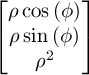

In [1]:
from sympy import Matrix, cos, sin

rho, phi = symbols ('rho,phi')
X = Matrix([rho*cos(phi), rho*sin(phi), rho**2])
X

Hier funktionieren jetzt z.B. substituieren, differenzieren, usw. wie bei einfachen Ausdrücken

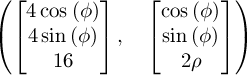

In [1]:
X.subs(rho, 4), X.diff(rho)

Alle partiellen Ableitungen bzgl. $\rho$ und $\phi$ (Jacobi-Matrix)

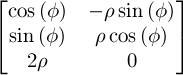

In [1]:
Y = (rho, phi)
X.jacobian(Y)

## Effiziente umfangreichere numerische Berechnung

Numerische Auswertung symbolischer Ausdrücke ist oft sehr langsam im Vergleich zu Python- oder sogar NumPy-Funktionen.  SymPy bietet Möglichkeiten, symbolische Ausdrücke in effizient(er)en Code zu übersetzen.

``` python 
sympy.lambdify(args, expr, modules)
```

`args` ist das Tupel der symbolischen Argumente oder ein einzelnes Symbol, `expr` ist der zu optimierende Ausdruck, `modules` ist das zu verwendende Backend. Wir verwenden hier `'numpy'`.

In [1]:
x = symbols('x')
expr = exp(x) + x**2
expr

In [1]:
from sympy import lambdify

f = lambdify(x, expr, 'numpy')
f(1)

`f` lässt sich auch auf Arrays anwenden:

In [1]:
import numpy as np
X = np.linspace(0, 1, 1000)
max(f(X))

In [1]:
%timeit f(X)

32.1 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [1]:
%timeit [expr.evalf(subs={x:xv}) for xv in X]

337 ms ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Ableitung Funktion mehrer Veränderlicher: Jacobi-Matrix


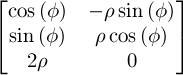

In [1]:
from sympy import Matrix, cos, sin, flatten

rho, phi = symbols('rho,phi')
Mat = Matrix([rho*cos(phi), rho*sin(phi), rho**2])
X = (rho, phi)
Jac = Mat.jacobian(X)
Jac

In [1]:
f = lambdify(flatten(X), Jac, 'numpy')

In [1]:
f(4, 4)

array([[-0.65364362,  3.02720998],
       [-0.7568025 , -2.61457448],
       [ 8.        ,  0.        ]])

## Primzahlen

Wir schauen uns hier nur Funktionalität im Zusammenhang mit Primzahlen an.

Ein Algorithmus zur Erzeugung von Primzahlen ist z.B. der *Sieve von Eratosthenes* 

``` python
sympy.sieve
```

Das ist eine unendliche Liste aller Primzahlen. Es wird aber nur soviel berechnet wie gebraucht wird.


In [1]:
from sympy import sieve

25 in sieve

False

``` python
sympy.primerange(a,b)
```
gibt alle Primzahlen im Bereich von $a$ bis $b$ als Generator wieder.


In [1]:
from sympy import primerange

In [1]:
list(primerange(10,30))

``` python
sympy.isprime(number)
```
Testet die gegebene Zahl, ob sie eine Primzahl ist und gibt entsprechend ```True``` oder ```False``` zurück


In [1]:
from sympy import isprime
isprime(29)

True